In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('salary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [7]:
df[df['company_size'] == 'L'][df['salary'] == df['salary'].max()]

C:\Users\User\AppData\Local\Temp\ipykernel_14916\779608030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['company_size'] == 'L'][df['salary'] == df['salary'].max()]


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
3580,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,L


C:\Users\User\AppData\Local\Temp\ipykernel_14916\1445759254.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['company_size'] == 'L'][df['company_location'] == 'US'].sort_values(by=['salary_in_usd'], ascending=False).head(5).plot.bar(x='job_title', y='salary_in_usd')


<Axes: xlabel='job_title'>

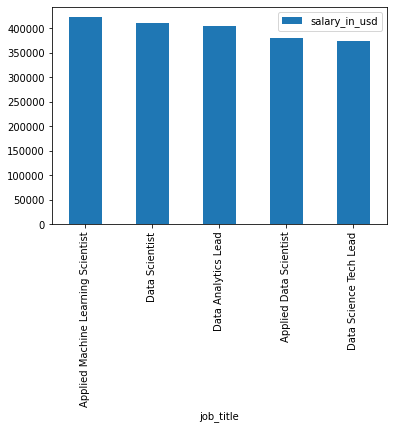

In [20]:
df[df['company_size'] == 'L'][df['company_location'] == 'US'].sort_values(by=['salary_in_usd'], ascending=False).head(5).plot.bar(x='job_title', y='salary_in_usd')

<Axes: xlabel='company_location'>

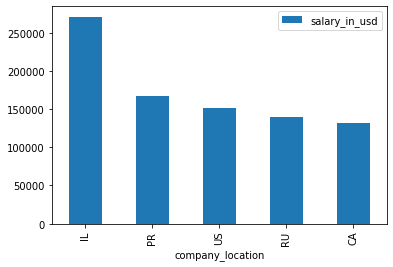

In [19]:
# Find average biggest salary per country
df.groupby('company_location')['salary_in_usd'].mean().reset_index().sort_values(by=['salary_in_usd'], ascending=False).head().plot.bar(x='company_location', y='salary_in_usd')

<Axes: ylabel='total'>

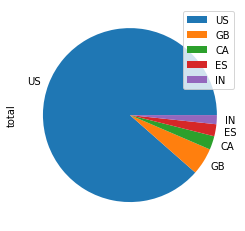

In [42]:
dfx = df['company_location'].value_counts().head()
dfx = pd.DataFrame({'total':dfx.values}, index=dfx.index)
dfx.plot.pie(y='total')

<Axes: xlabel='employment'>

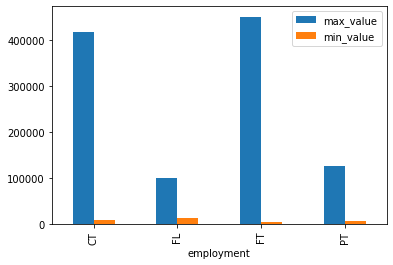

In [56]:
max_value = df.groupby('employment_type')['salary_in_usd'].max().reset_index()['salary_in_usd'].values
min_value = df.groupby('employment_type')['salary_in_usd'].min().reset_index()['salary_in_usd'].values
employment = df.groupby('employment_type')['salary_in_usd'].min().reset_index()['employment_type']

dfx = pd.DataFrame({'employment':employment,
                    'max_value':max_value,
                    'min_value':min_value})
dfx.plot.bar(x='employment')

<Axes: xlabel='employment_type'>

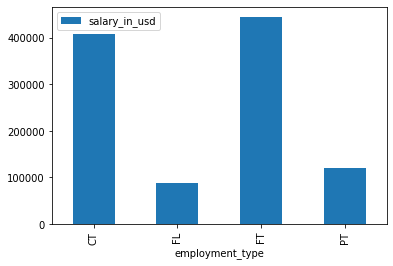

In [59]:
dfx = df.groupby('employment_type')['salary_in_usd'].max() - df.groupby('employment_type')['salary_in_usd'].min()
dfx.reset_index().plot.bar(x='employment_type')

# Basic Spreadsheet Function with Pandas

In [100]:
def average(df, column, range):

    if len(range) != 2:
        return 'range must be in format [first index, last index]'
    
    if df[column].dtypes not in ['int64', 'int32', 'int16']:
        return 'column must provide integer data types'
    
    try:
        return df[column].loc[range[0]:range[1]].mean()
    except:
        return 'your data type is not available in dataframe'

def max(df, column, range):

    if len(range) != 2:
        return 'range must be in format [first index, last index]'
    
    if df[column].dtypes not in ['int64', 'int32', 'int16']:
        return 'column must provide integer data types'
    
    try:        
        return df[column].loc[range[0]:range[1]].max()
    except:
        return 'your data type is not available in dataframe'

def min(df, column, range):

    if len(range) != 2:
        return 'range must be in format [first index, last index]'
    
    if df[column].dtypes not in ['int64', 'int32', 'int16']:
        return 'column must provide integer data types'
    
    try:
        return df[column].loc[range[0]:range[1]].min()
    except:
        return 'the column is not in dataframe'

def count(df, column, type='all'):

    if type != 'all':
        try:
            return df[df[column] == type][column].value_counts()
        except:
            return 'your data type is not available in dataframe'

    try:
        return df[column].value_counts()
    except:
        return 'the column is not in dataframe'
    
def mode(df, column, range=None):

    if range == None:
        try:
            result = count(df, column, type='all').reset_index()
            return result[result[column] == result[column].values[0]]['index']
        except:
            return 'the column is not in dataframe'

    try:
        result = count(df.loc[range[0]:range[1]], column, type='all').reset_index()
        return result[result[column] == result[column].values[0]]['index']
    except:
        return 'the column is not in dataframe'

In [87]:
count(df.loc[0:10], 'job_title').head().reset_index()['job_title'].values[0]

4

In [99]:
mode(df, 'job_title')

0    Data Engineer
Name: index, dtype: object